In [132]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

url = "https://tr.wikipedia.org/wiki/T%C3%BCrkiye%27de_COVID-19_pandemisi"

response = requests.get(url) # sitenin html kodunu çektik
soup = BeautifulSoup(response.text) # sitenin html kodunu beautifulsoup objesine çevirdik

table = soup.findAll("table") # bütün table'ları çektik (son table bizim istediğimiz)
tbody = table[-1].find('tbody') # son table'ın body kısmını aldık
rows = tbody.findAll('tr') # tüm satırları çektik

mat = []

for row in rows: # her bir satır için
    satir = []
    cells = row.findAll('td') # o satırdaki elemanları bulduk
    for cell in cells: # o satırdaki her bir eleman için
        satir.append(cell.text.strip('\n')) # içinde yazan değeri çektik
    mat.append(satir)
    
df = pd.DataFrame(mat) # temizlenmemiş datayla bir pandas dataframe oluşturduk

df = df.dropna(thresh=9) # None olan satırlardan kurtulduk


def clearString(text):
    regex = "\[(.*?)\]"
    new_text = re.sub(regex, '', text)
    return new_text.strip()

for column in df.columns:
    df[column] = df[column].apply(clearString)
    
cols = ["Tarih", "Yeni_Hasta", "Toplam_Hasta", "Aktif_Hasta", "Yeni_Olum", "Toplam_Olum", "Yeni_Iyilesen", "Toplam_Iyilisen", "Entube", "Yogun_Bakim", "Yeni_Test", "Toplam_Test"]

df.columns = cols

def sayiyaCevir(text):
    if text == "-":
        return "0"
    text = text.replace(".", "")
    return text


# integera çevirmeden önce, - olan satırları 0'la değiştirdik ve sayıların ortasındaki noktaları sildik
for column in df.columns:
    df[column] = df[column].apply(sayiyaCevir)

    
for column in df.columns:
    if column != "Tarih":
        df[column] = df[column].astype("int")

        
aylar = {
    "Ocak": "1",
    "Şubat": "2",
    "Mart": "3",
    "Nisan": "4",
    "Mayıs": "5",
    "Haziran": "6",
    "Temmuz": "7",
    "Ağustos": "8",
    "Eylül": "9",
    "Ekim": "10",
    "Kasım": "11",
    "Aralık": "12"
}        

def tarihleriDuzelt(date):
    ay = date.split()[1]
    return date.split()[0] + "/" + aylar[ay] + "/" + date.split()[2]
    
df['Tarih'] = df['Tarih'].apply(tarihleriDuzelt)
df['Tarih'] =  pd.to_datetime(df['Tarih'], format="%d/%m/%Y")
df = df.set_index('Tarih')

df = df.drop(columns=["Yogun_Bakim", "Entube"])
df

,Yeni_Hasta,Toplam_Hasta,Aktif_Hasta,Yeni_Olum,Toplam_Olum,Yeni_Iyilesen,Toplam_Iyilisen,Yeni_Test,Toplam_Test
Tarih,,,,,,,,,
2020-03-11,1,1,0,0,0,0,0,0,0
2020-03-12,0,1,0,0,0,0,0,0,0
2020-03-13,4,5,0,0,0,0,0,0,0
2020-03-14,1,6,0,0,0,0,0,0,0
2020-03-15,12,18,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2021-04-20,2895,4384624,555882,346,36613,55592,3792129,322128,44409756
2021-04-21,2932,4446591,565274,362,36975,52213,3844342,318839,44728595
2021-04-22,3128,4501382,554118,354,37329,65593,3909935,312109,45040704


In [133]:
# Bir günde görülen en çok yeni hasta sayısı
result = df['Yeni_Hasta'].max()

# En çok hasta görülen günün olduğu satır
result = df[df['Yeni_Hasta'] == df['Yeni_Hasta'].max()]

# En çok toplam hasta olan gün
result = df[df['Toplam_Hasta'] == df['Toplam_Hasta'].max()]

# En çok aktif hasta olan gün
result = df[df['Aktif_Hasta'] == df['Aktif_Hasta'].max()]

# En çok aktif hasta olan gün
result = df[df['Yeni_Test'] == df['Yeni_Test'].max()]

result

,Yeni_Hasta,Toplam_Hasta,Aktif_Hasta,Yeni_Olum,Toplam_Olum,Yeni_Iyilesen,Toplam_Iyilisen,Yeni_Test,Toplam_Test
Tarih,,,,,,,,,
2021-04-20,2895,4384624,555882,346,36613,55592,3792129,322128,44409756


<AxesSubplot:xlabel='Tarih'>

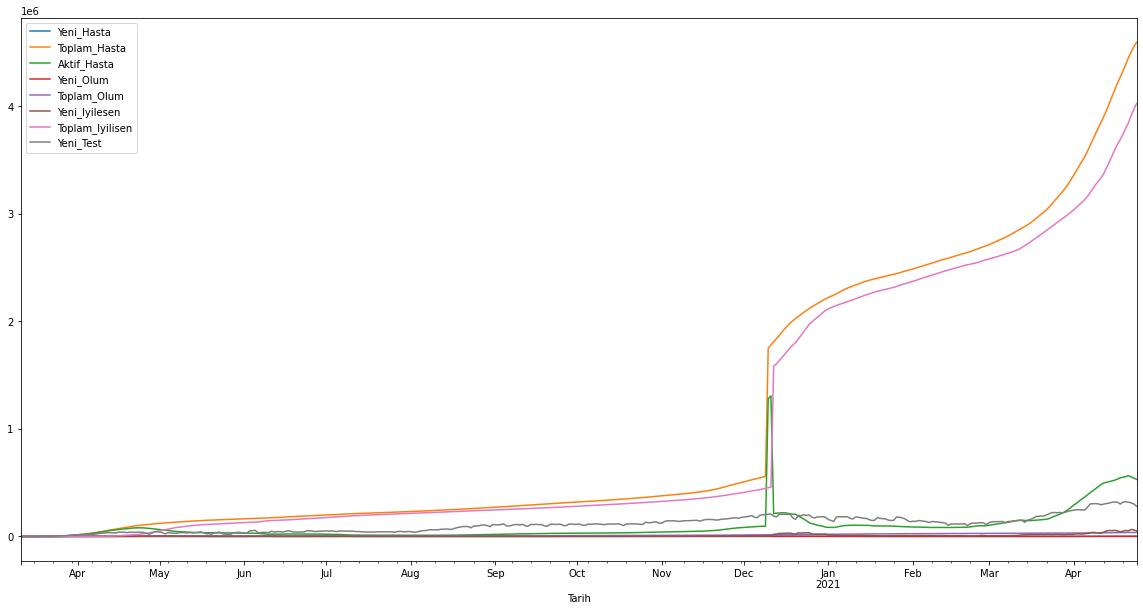

In [143]:
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 10]


baslangic = datetime(2021, 3, 1)
bitis = datetime(2021, 4, 1)

df = df.drop(columns=['Toplam_Test'])
df.plot()


Tarih
2020-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2021-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, dtype: object

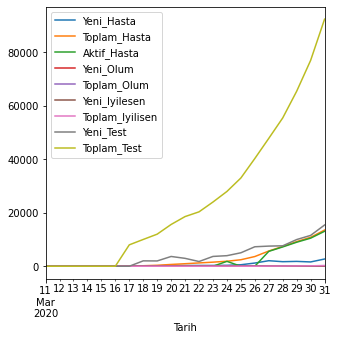

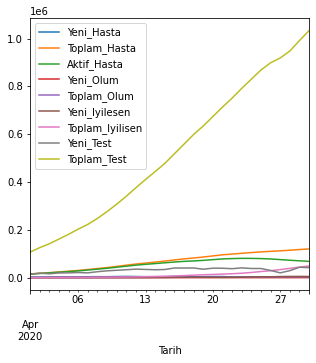

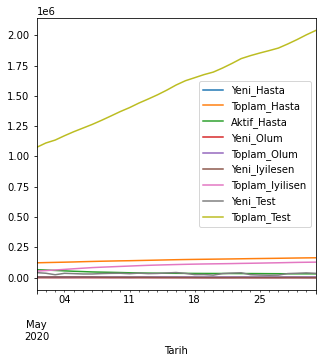

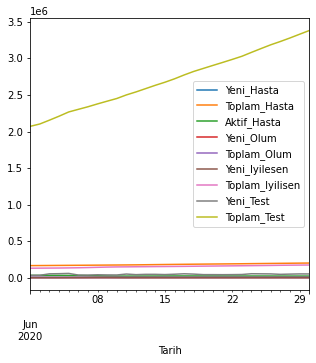

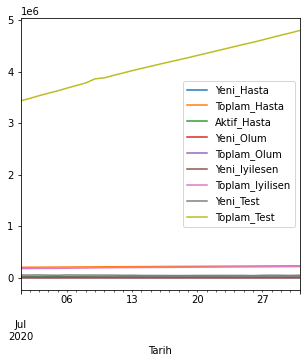

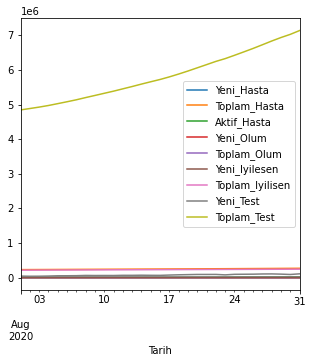

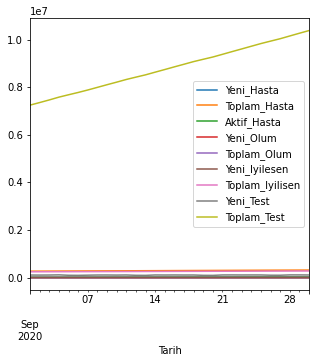

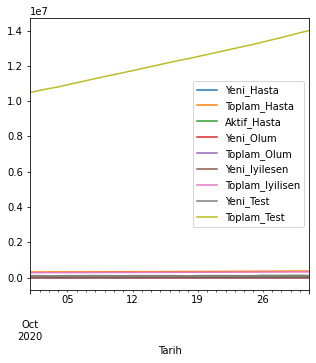

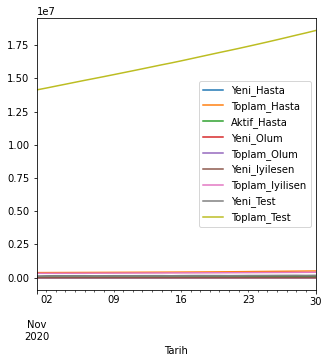

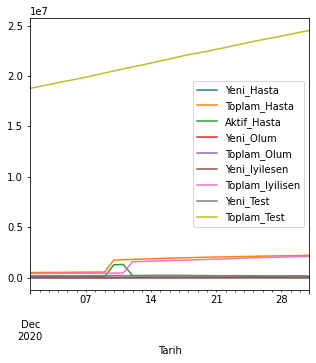

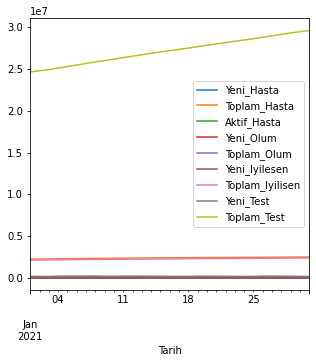

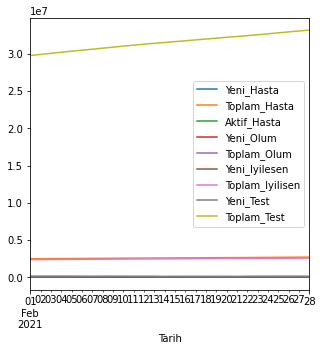

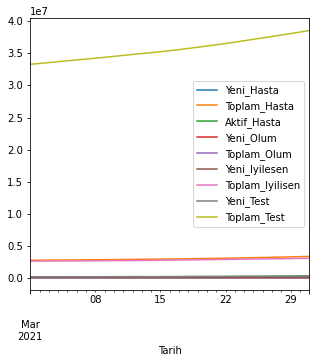

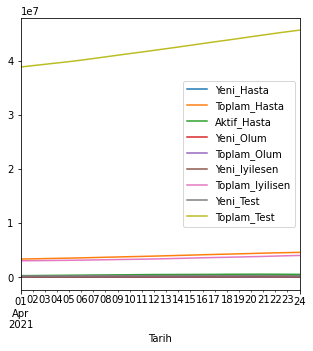

In [135]:
plt.rcParams['figure.figsize'] = [5, 5]


aylik = df.groupby(pd.Grouper(freq="M")) # aylık olarak gruplama
aylik.plot()

<AxesSubplot:>

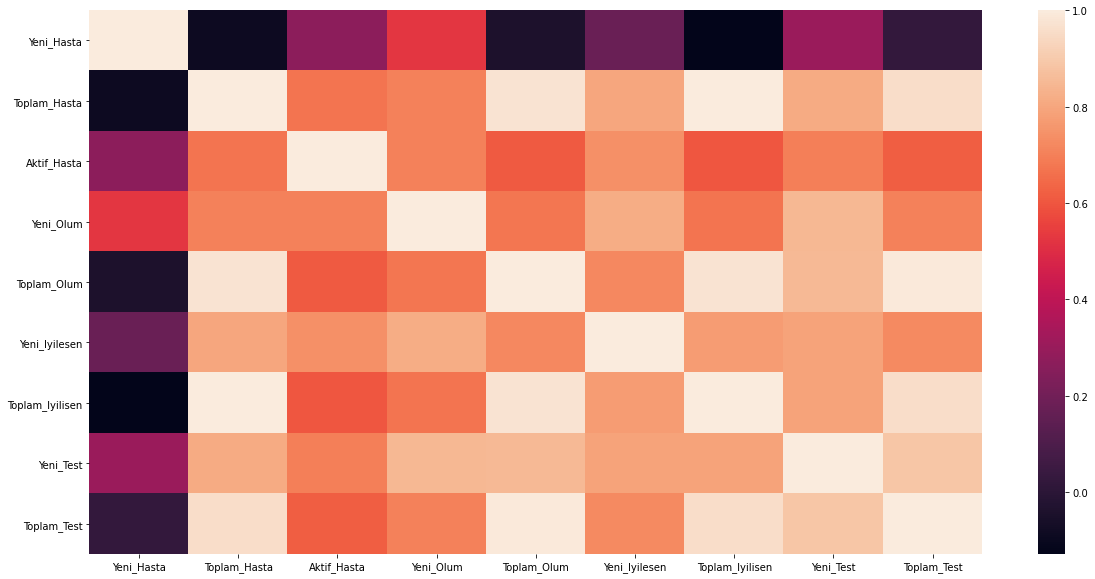

In [141]:
import seaborn as sns

correlation = df.corr()
sns.heatmap(correlation)